In [1]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from pyriemann.estimation import XdawnCovariances
from pyriemann.estimation import Covariances
import sys
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pyriemann.tangentspace import TangentSpace

import plotly.graph_objects as go # For the 3D visualizations, install using pip

np.random.seed(1)

In [2]:
from moabb.paradigms import CVEP
sys.path.insert(0,"C:\\Users\\s.velut\\Documents\\These\\moabb\\moabb\\datasets")
sys.path.insert(0,"C:\\Users\\s.velut\\Documents\\These\\moabb\\moabb\\paradigms")
sys.path.insert(0,"C:/Users/s.velut/Documents/These/Protheus_PHD")
sys.path.insert(0,"C:\\Users\\s.velut\\Documents\\These\\riemannian_tSNE")
from Scripts.utils import get_BVEP_data, prepare_data, get_TSNE_visu
from R_TSNE import R_TSNE
from castillos2023 import CasitllosCVEP100,CasitllosCVEP40,CasitllosBurstVEP100,CasitllosBurstVEP40

c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\moabb\pipelines\__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


In [10]:
dataset_moabb = CasitllosBurstVEP100()
paradigm = CVEP()
print(paradigm.n_classes)

X, labels, meta = paradigm.get_data(dataset=dataset_moabb, subjects=[12])
print("balancing the number of ones and zeros")
rus = RandomUnderSampler()
counter=np.array(range(0,len(labels))).reshape(-1,1)
index,_ = rus.fit_resample(counter,labels[:])
X = np.squeeze(X[index,:,:], axis=1)
labels = np.squeeze(labels[index])

# X = np.concatenate([X[0:200],X[-200:]])
# labels = np.concatenate([labels[0:200],labels[-200:]])
xdawncov = XdawnCovariances(estimator="lwf",xdawn_estimator="lwf",nfilter=8)
X = xdawncov.fit_transform(X,labels)
all_cov = Covariances(estimator="lwf").transform(X)
# raw = dataset_moabb.get_data()
# print(raw)

Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
balancing the number of ones and zeros


KeyboardInterrupt: 

In [ ]:
all_cov.shape

(2400, 32, 32)

In [18]:
R_TSNE_moabb = R_TSNE(perplexity = 1800, verbosity = 1, max_it=200, max_time=2000)
res_tSNE_moabb = R_TSNE_moabb.fit(all_cov)

Optimizing...
Optimization done in 1844.44 seconds.


C:\Users\s.velut\Documents\These\riemannian_tSNE\R_TSNE.py:259: UserWarning:

Maximum iterations reached.



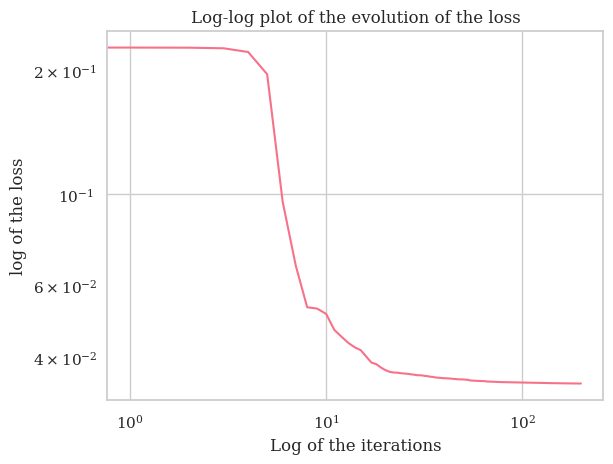

In [19]:
R_TSNE_moabb.plot_loss()

In [20]:
# res_subject_8 = res_tSNE_moabb
np.save("reduced_sets/subject_12_Castillos_xdawncov",res_tSNE_moabb)
np.save("reduced_sets/subject_12_Castillos_xdawncov_labels",labels)

## Load directly the reduced result:

In [7]:
res_subject_1 = np.load("reduced_sets/subject_1_Castillos_xdawncov.npy")
# res_subject_1_labels = np.load("reduced_sets/subject_1_Castillos_xdawncov_labels.npy")
res_subject_2 = np.load("reduced_sets/subject_2_Castillos_xdawncov.npy")
res_subject_2_labels = np.load("reduced_sets/subject_2_Castillos_xdawncov_labels.npy")
res_subject_3 = np.load("reduced_sets/subject_3_Castillos_xdawncov.npy")
res_subject_3_labels = np.load("reduced_sets/subject_3_Castillos_xdawncov_labels.npy")
res_subject_4 = np.load("reduced_sets/subject_4_Castillos_xdawncov.npy")
res_subject_4_labels = np.load("reduced_sets/subject_4_Castillos_xdawncov_labels.npy")
res_subject_5 = np.load("reduced_sets/subject_5_Castillos_xdawncov.npy")
res_subject_5_labels = np.load("reduced_sets/subject_5_Castillos_xdawncov_labels.npy")
res_subject_6 = np.load("reduced_sets/subject_6_Castillos_xdawncov.npy")
res_subject_6_labels = np.load("reduced_sets/subject_6_Castillos_xdawncov_labels.npy")
res_subject_7 = np.load("reduced_sets/subject_7_Castillos_xdawncov.npy")
res_subject_7_labels = np.load("reduced_sets/subject_7_Castillos_xdawncov_labels.npy")
res_subject_8 = np.load("reduced_sets/subject_8_Castillos_xdawncov.npy")
res_subject_8_labels = np.load("reduced_sets/subject_8_Castillos_xdawncov_labels.npy")
res_subject_9 = np.load("reduced_sets/subject_9_Castillos_xdawncov.npy")
res_subject_9_labels = np.load("reduced_sets/subject_9_Castillos_xdawncov_labels.npy")
res_subject_10 = np.load("reduced_sets/subject_10_Castillos_xdawncov.npy")
res_subject_10_labels = np.load("reduced_sets/subject_10_Castillos_xdawncov_labels.npy")
res_subject_11 = np.load("reduced_sets/subject_11_Castillos_xdawncov.npy")
res_subject_11_labels = np.load("reduced_sets/subject_11_Castillos_xdawncov_labels.npy")
res_subject_12 = np.load("reduced_sets/subject_12_Castillos_xdawncov.npy")
res_subject_12_labels = np.load("reduced_sets/subject_12_Castillos_xdawncov_labels.npy")

res_subject = [res_subject_1,res_subject_2,res_subject_3,res_subject_4,res_subject_5,res_subject_6,
               res_subject_7,res_subject_8,res_subject_9,res_subject_10,res_subject_11,res_subject_12]
res_subject_labels = [None,res_subject_2_labels,res_subject_3_labels,res_subject_4_labels,res_subject_5_labels,res_subject_6_labels,
               res_subject_7_labels,res_subject_8_labels,res_subject_9_labels,res_subject_10_labels,res_subject_11_labels,res_subject_12_labels]

In [25]:
import plotly.express as px
print(px.colors.qualitative.Pastel)
Pastel = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)', 'rgb(139, 224, 164)', 'rgb(180, 151, 231)', 'rgb(179, 179, 179)','rgb(109, 229, 69)']


fig = go.Figure()

for i in range(12):
    fig = fig.add_trace(
    go.Scatter3d(
        x=res_subject[i][:, 0, 0],
        y=res_subject[i][:, 0, 1],
        z=res_subject[i][:, 1, 1],
        mode="markers",
        name=i,
        marker=dict(size=8, color=Pastel[i], opacity=0.9)
        )
    )

fig.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )

fig.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig.show()

['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)', 'rgb(139, 224, 164)', 'rgb(180, 151, 231)', 'rgb(179, 179, 179)']


In [18]:
res_subject[i][np.where(res_subject_labels[i]=='0'), 0, 0].shape

(1, 1200)

## Load directly the reduced result:

In [25]:
import plotly.express as px
Pastel = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)', 'rgb(139, 224, 164)', 'rgb(180, 151, 231)', 'rgb(179, 179, 179)','rgb(109, 229, 69)']


fig = go.Figure()
start = 6

for j in range(start,12):
    i = j-start
    fig = fig.add_trace(
    go.Scatter3d(
        x=res_subject[j][np.where(res_subject_labels[i]=='0'), 0, 0][0],
        y=res_subject[j][np.where(res_subject_labels[i]=='0'), 0, 1][0],
        z=res_subject[j][np.where(res_subject_labels[i]=='0'), 1, 1][0],
        mode="markers",
        name="0_{}".format(j),
        marker=dict(size=8, color=Pastel[i], opacity=0.9)
        )
    )

    fig = fig.add_trace(
    go.Scatter3d(
        x=res_subject[j][np.where(res_subject_labels[i]=='1'), 0, 0][0],
        y=res_subject[j][np.where(res_subject_labels[i]=='1'), 0, 1][0],
        z=res_subject[j][np.where(res_subject_labels[i]=='1'), 1, 1][0],
        mode="markers",
        name="1_{}".format(j),
        marker=dict(size=8, color=Pastel[-i], opacity=0.9)
        )
    )

fig.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )

fig.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig.show()

In [5]:
%matplotlib Qt

In [16]:
fig = go.Figure()

fig = fig.add_trace(
go.Scatter3d(
    x=res_subject_5[:, 0, 0],
    y=res_subject_5[:, 0, 1],
    z=res_subject_5[:, 1, 1],
    mode="markers",
    name="5",
    marker=dict(size=8, color='red', opacity=0.9)
    )
)

fig = fig.add_trace(
go.Scatter3d(
    x=res_subject_3[:, 0, 0],
    y=res_subject_3[:, 0, 1],
    z=res_subject_3[:, 1, 1],
    mode="markers",
    name="3",
    marker=dict(size=8, color='green', opacity=0.9)
    )
)

fig = fig.add_trace(
go.Scatter3d(
    x=res_subject_4[:, 0, 0],
    y=res_subject_4[:, 0, 1],
    z=res_subject_4[:, 1, 1],
    mode="markers",
    name="4",
    marker=dict(size=8, color='blue', opacity=0.9)
    )
)

# fig = fig.add_trace(
# go.Scatter3d(
#     x=res_subject_8[np.where(labels=='0')[0], 0, 0],
#     y=res_subject_8[np.where(labels=='0')[0], 0, 1],
#     z=res_subject_8[np.where(labels=='0')[0], 1, 1],
#     mode="markers",
#     name="0",
#     marker=dict(size=8, color='blue', opacity=0.9)
#     )
# )

# fig = fig.add_trace(
# go.Scatter3d(
#     x=res_subject_1[np.where(labels=='1')[0], 0, 0],
#     y=res_subject_1[np.where(labels=='1')[0], 0, 1],
#     z=res_subject_1[np.where(labels=='1')[0], 1, 1],
#     mode="markers",
#     name="1",
#     marker=dict(size=8, color='green', opacity=0.9)
#     )
# )

fig = fig.add_trace(
go.Scatter3d(
    x=res_subject_6[:, 0, 0],
    y=res_subject_6[:, 0, 1],
    z=res_subject_6[:, 1, 1],
    mode="markers",
    name="6",
    marker=dict(size=8, color='orange', opacity=0.9)
    )
)

fig.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )

fig.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig.show()

## Visualize RPA

In [39]:
res_s0_target_org = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_0_cov_target_org.npy")
res_s1_org = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_1_cov_train_org.npy")
res_s10_org = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_10_cov_train_org.npy")
res_s11_org = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_11_cov_train_org.npy")
res_s2_org = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_2_cov_train_org.npy")
res_s0_target_rct = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_0_cov_target_rct.npy")
res_s1_rct = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_1_cov_train_rct.npy")
res_s10_rct = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_10_cov_train_rct.npy")
res_s11_rct = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_11_cov_train_rct.npy")
res_s2_rct = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_2_cov_train_rct.npy")
res_s0_target_rpa = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_0_cov_target_rpa.npy")
res_s1_rpa = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_1_cov_train_rpa.npy")
res_s10_rpa = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_10_cov_train_rpa.npy")
res_s11_rpa = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_11_cov_train_rpa.npy")
res_s2_rpa = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S0_DSource_sub_2_cov_train_rpa.npy")

res_org = [res_s0_target_org,res_s1_org,res_s10_org,res_s11_org,res_s2_org]
name_org = ["S0","S1","S10","S11","S2"]
Pastel = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)', 'rgb(139, 224, 164)', 'rgb(180, 151, 231)', 'rgb(179, 179, 179)','rgb(109, 229, 69)']
res_rct = [res_s0_target_rct,res_s1_rct,res_s10_rct,res_s11_rct,res_s2_rct]
res_rpa = [res_s0_target_rpa,res_s1_rpa,res_s10_rpa,res_s11_rpa,res_s2_rpa]

In [40]:
fig1 = go.Figure()

for res,name,c in zip(res_org,name_org,Pastel):
    fig1 = fig1.add_trace(
    go.Scatter3d(
        x=res[:, 0, 0],
        y=res[:, 0, 1],
        z=res[:, 1, 1],
        mode="markers",
        name=name,
        marker=dict(size=8, color=c, opacity=0.9)
        )
    )

fig1.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )

fig1.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig2 = go.Figure()

for res,name,c in zip(res_rct,name_org,Pastel):
    fig2 = fig2.add_trace(
    go.Scatter3d(
        x=res[:, 0, 0],
        y=res[:, 0, 1],
        z=res[:, 1, 1],
        mode="markers",
        name=name,
        marker=dict(size=8, color=c, opacity=0.9)
        )
    )

fig2.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )

fig2.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig3 = go.Figure()

for res,name,c in zip(res_rpa,name_org,Pastel):
    fig3 = fig3.add_trace(
    go.Scatter3d(
        x=res[:, 0, 0],
        y=res[:, 0, 1],
        z=res[:, 1, 1],
        mode="markers",
        name=name,
        marker=dict(size=8, color=c, opacity=0.9)
        )
    )

fig3.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )

fig3.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

# fig.update_layout(
#     scene = dict(
#         xaxis = dict(nticks=4, range=[-100,10000],),
#                      yaxis = dict(nticks=4, range=[-10000,10000],),
#                      zaxis = dict(nticks=4, range=[-100,10000],),),
#     width=700,
#     margin=dict(r=20, l=10, b=10, t=10))

fig1.show()
fig2.show()
fig3.show()

In [41]:
res_s0_org = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_0_cov_train_org.npy")
res_s1_target_org = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_1_cov_target_org.npy")
res_s10_org = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_10_cov_train_org.npy")
res_s11_org = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_11_cov_train_org.npy")
res_s2_org = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_2_cov_train_org.npy")
res_s0_rct = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_0_cov_train_rct.npy")
res_s1_target_rct = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_1_cov_target_rct.npy")
res_s10_rct = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_10_cov_train_rct.npy")
res_s11_rct = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_11_cov_train_rct.npy")
res_s2_rct = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_2_cov_train_rct.npy")
res_s0_rpa = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_0_cov_train_rpa.npy")
res_s1_target_rpa = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_1_cov_target_rpa.npy")
res_s10_rpa = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_10_cov_train_rpa.npy")
res_s11_rpa = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_11_cov_train_rpa.npy")
res_s2_rpa = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/reduced_sets/S1_DSource_sub_2_cov_train_rpa.npy")

res_org = [res_s0_org,res_s1_target_org,res_s10_org,res_s11_org,res_s2_org]
name_org = ["S0","S1","S10","S11","S2"]
Pastel = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)', 'rgb(139, 224, 164)', 'rgb(180, 151, 231)', 'rgb(179, 179, 179)','rgb(109, 229, 69)']
res_rct = [res_s0_rct,res_s1_target_rct,res_s10_rct,res_s11_rct,res_s2_rct]
res_rpa = [res_s0_rpa,res_s1_target_rpa,res_s10_rpa,res_s11_rpa,res_s2_rpa]

In [42]:
fig1 = go.Figure()

for res,name,c in zip(res_org,name_org,Pastel):
    fig1 = fig1.add_trace(
    go.Scatter3d(
        x=res[:, 0, 0],
        y=res[:, 0, 1],
        z=res[:, 1, 1],
        mode="markers",
        name=name,
        marker=dict(size=8, color=c, opacity=0.9)
        )
    )

fig1.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )

fig1.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig2 = go.Figure()

for res,name,c in zip(res_rct,name_org,Pastel):
    fig2 = fig2.add_trace(
    go.Scatter3d(
        x=res[:, 0, 0],
        y=res[:, 0, 1],
        z=res[:, 1, 1],
        mode="markers",
        name=name,
        marker=dict(size=8, color=c, opacity=0.9)
        )
    )

fig2.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )

fig2.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig3 = go.Figure()

for res,name,c in zip(res_rpa,name_org,Pastel):
    fig3 = fig3.add_trace(
    go.Scatter3d(
        x=res[:, 0, 0],
        y=res[:, 0, 1],
        z=res[:, 1, 1],
        mode="markers",
        name=name,
        marker=dict(size=8, color=c, opacity=0.9)
        )
    )

fig3.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )

fig3.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

# fig.update_layout(
#     scene = dict(
#         xaxis = dict(nticks=4, range=[-100,10000],),
#                      yaxis = dict(nticks=4, range=[-10000,10000],),
#                      zaxis = dict(nticks=4, range=[-100,10000],),),
#     width=700,
#     margin=dict(r=20, l=10, b=10, t=10))

fig1.show()
fig2.show()
fig3.show()

## Visualize TSMNet normalisation layers

In [3]:
Pastel = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)', 'rgb(139, 224, 164)', 'rgb(180, 151, 231)', 'rgb(179, 179, 179)','rgb(109, 229, 69)']

res1 = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/TSMNet_test/DSBNSPDBNNet_visu_0.npy")
# res_sub1_val = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/TSMNet_test/SDPSMNet_val_visu_0.npy")[0]


res1_couche0 = res1[1]
res1_couche1 = res1[0]

res1_S1C0_L1 = res1_couche0[:150]
res1_S1C0_L0 = res1_couche0[150:300]
res1_S2C0_L1 = res1_couche0[300:450]
res1_S2C0_L0 = res1_couche0[450:600]
res1_ST1C0_L1 = res1_couche0[600:750]
res1_ST1C0_L0 = res1_couche0[750:900]
res1_ST2C0_L1 = res1_couche0[900:1050]
res1_ST2C0_L0 = res1_couche0[1050:1200]
res1_TC0_L1 = res1_couche0[1200:1350]
res1_TC0_L0 = res1_couche0[1350:1500]

res1_S1C1_L1 = res1_couche1[:150]
res1_S1C1_L0 = res1_couche1[150:300]
res1_S2C1_L1 = res1_couche1[300:450]
res1_S2C1_L0 = res1_couche1[450:600]
res1_ST1C1_L1 = res1_couche1[600:750]
res1_ST1C1_L0 = res1_couche1[750:900]
res1_ST2C1_L1 = res1_couche1[900:1050]
res1_ST2C1_L0 = res1_couche1[1050:1200]
res1_TC1_L1 = res1_couche1[1200:1350]
res1_TC1_L0 = res1_couche1[1350:1500]



In [4]:
# Pastel = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)', 'rgb(139, 224, 164)', 'rgb(180, 151, 231)', 'rgb(179, 179, 179)','rgb(109, 229, 69)']

# res1 = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/TSMNet_test/DSBNSPDBNNet_visu_1.npy")
# # res_sub1_val = np.load("C:/Users/s.velut/Documents/These/Protheus_PHD/results/results/Score_TF/TSMNet_test/SDPSMNet_val_visu_0.npy")[0]


# res1_couche0 = res1[1]
# res1_couche1 = res1[0]

# res1_S1C0_L1 = res1_couche0[:50]
# res1_S1C0_L0 = res1_couche0[50:100]
# res1_S2C0_L1 = res1_couche0[100:150]
# res1_S2C0_L0 = res1_couche0[150:200]
# res1_S3C0_L1 = res1_couche0[200:250]
# res1_S3C0_L0 = res1_couche0[250:300]
# res1_ST1C0_L1 = res1_couche0[300:350]
# res1_ST1C0_L0 = res1_couche0[350:400]
# res1_ST2C0_L1 = res1_couche0[400:450]
# res1_ST2C0_L0 = res1_couche0[450:500]
# res1_ST3C0_L1 = res1_couche0[500:550]
# res1_ST3C0_L0 = res1_couche0[550:600]
# res1_TC0_L1 = res1_couche0[600:650]
# res1_TC0_L0 = res1_couche0[650:700]

# res1_S1C1_L1 = res1_couche1[:50]
# res1_S1C1_L0 = res1_couche1[50:100]
# res1_S2C1_L1 = res1_couche1[100:150]
# res1_S2C1_L0 = res1_couche1[150:200]
# res1_S3C1_L1 = res1_couche1[200:250]
# res1_S3C1_L0 = res1_couche1[250:300]
# res1_ST1C1_L1 = res1_couche1[300:350]
# res1_ST1C1_L0 = res1_couche1[350:400]
# res1_ST2C1_L1 = res1_couche1[400:450]
# res1_ST2C1_L0 = res1_couche1[450:500]
# res1_ST3C1_L1 = res1_couche1[500:550]
# res1_ST3C1_L0 = res1_couche1[550:600]
# res1_TC1_L1 = res1_couche1[600:650]
# res1_TC1_L0 = res1_couche1[650:700]


# # res_by_layer1 = [res1_S1C1_L1, res1_S1C1_L0, res1_S2C1_L1,res1_S2C1_L0,res1_S3C1_L1,res1_S3C1_L0,res1_ST1C1_L1,
# #                  res1_ST1C1_L0, res1_ST2C1_L1,res1_ST2C1_L0,res1_ST3C1_L1,res1_ST3C1_L0,
# #                  res1_TC1_L1,res1_TC1_L0]
# # res_by_layer0 = [res1_S1C0_L1, res1_S1C0_L0, res1_S2C0_L1,res1_S2C0_L0,res1_S3C0_L1,res1_S3C0_L0,
# #                  res1_ST1C0_L1, res1_ST1C0_L0, res1_ST2C0_L1,res1_ST2C0_L0,
# #                  res1_ST3C0_L1,res1_ST3C0_L0,res1_TC0_L1,res1_TC0_L0]
# # name_by_layer = ["tgval_lab1","tgval_lab0","source1_lab1","source1_lab0","source2_lab1","source2_lab0","tgtrain_lab1","tgtrain_lab0"
# #                  ,"source_train1_lab1","source_train1_lab0","source_train2_lab1","source_train2_lab0","target_lab1","target_lab0"]

# res_by_layer1 = [res1_S1C1_L1, res1_S1C1_L0, res1_S2C1_L1,res1_S2C1_L0,res1_S3C1_L1,res1_S3C1_L0,
#                  res1_TC1_L1,res1_TC1_L0]
# res_by_layer0 = [res1_S1C0_L1, res1_S1C0_L0, res1_S2C0_L1,res1_S2C0_L0,res1_S3C0_L1,res1_S3C0_L0,
#                  res1_TC0_L1,res1_TC0_L0]
# name_by_layer = ["source1_lab1","source1_lab0","tgval_lab1","tgval_lab0","source2_lab1","source2_lab0","target_lab1","target_lab0"]


In [5]:
res1.shape

(2, 1500, 2)

In [8]:
res_by_layer1 = [res1_S1C1_L1, res1_S1C1_L0, res1_S2C1_L1,res1_S2C1_L0,res1_ST1C1_L1, res1_ST1C1_L0, res1_ST2C1_L1,res1_ST2C1_L0,
                 res1_TC1_L1,res1_TC1_L0]
res_by_layer0 = [res1_S1C0_L1, res1_S1C0_L0, res1_S2C0_L1,res1_S2C0_L0,res1_ST1C0_L1, res1_ST1C0_L0, res1_ST2C0_L1,res1_ST2C0_L0,
                 res1_TC0_L1,res1_TC0_L0]
name_by_layer = ["source1_val_lab1","source1_val_lab0","source2_val_lab1","source2_val_lab0","source_train1_lab1","source_train1_lab0","source_train2_lab1","source_train2_lab0",
                 "target_lab1","target_lab0"]


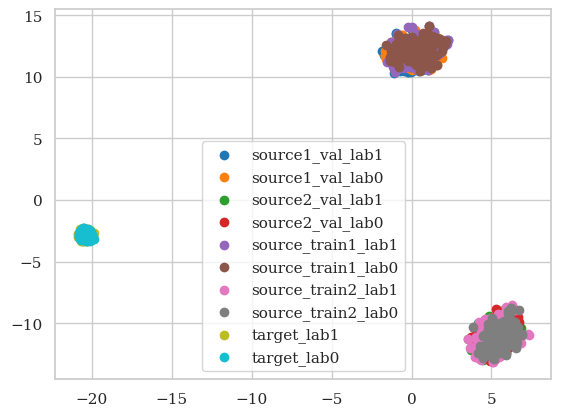

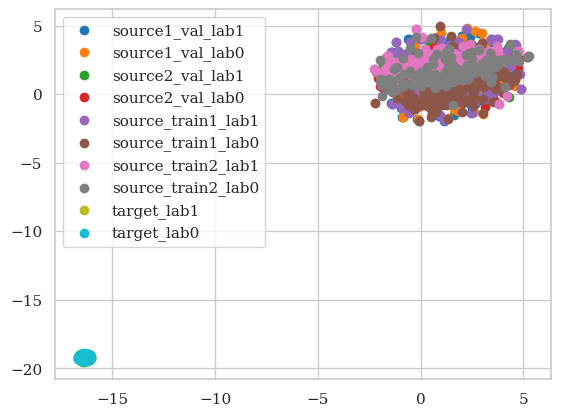

In [9]:
from matplotlib import colors


color = list(colors.TABLEAU_COLORS)


fig0 = plt.figure(1)

for res,n, c in zip(res_by_layer0,name_by_layer, color):
    plt.scatter(res[:,0],res[:,1],c=c,label=n)
    plt.legend()

fig1 = plt.figure(2)

for res,n, c in zip(res_by_layer1,name_by_layer, color):
    plt.scatter(res[:,0],res[:,1],c=c,label=n)
    plt.legend()

plt.show(fig0)
plt.show(fig1)

In [155]:
fig0 = go.Figure()

for res,n, c in zip(res_by_layer0,name_by_layer, Pastel[:6]):
    fig0 = fig0.add_trace(
    go.Scatter3d(
        x=res[:, 0, 0],
        y=res[:, 0, 1],
        z=res[:, 1, 1],
        mode="markers",
        name=n,
        marker=dict(size=8, color=c, opacity=0.9)
        )
    )
fig0.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )
fig0.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig1 = go.Figure()

for res,n, c in zip(res_by_layer1,name_by_layer, Pastel[:6]):
    fig1 = fig1.add_trace(
    go.Scatter3d(
        x=res[:, 0, 0],
        y=res[:, 0, 1],
        z=res[:, 1, 1],
        mode="markers",
        name=n,
        marker=dict(size=8, color=c, opacity=0.9)
        )
    )
fig1.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )
fig1.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig0.show()
fig1.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

### TSNE inputs

In [37]:
subjects = [1,2,3]
# subjects = [1,2,3,4,5,6,7,8,9,10,11,12]
n_channels = 32
on_frame = True
if on_frame:
    freq = 60
else:
    freq = 500

raw_data,labels,codes,labels_codes = get_BVEP_data(subjects,on_frame)
X_parent,Y_parent,domains_parent = prepare_data(subjects,raw_data,labels,on_frame,True,False,codes)
X_parent_rec,Y_parent_rec,domains_parent_rec = prepare_data(subjects,raw_data,labels,on_frame,True,True,codes)

Choosing the first None classes from all possible events.


None
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
C:\Users\s.velut\mne_data\MNE-4class-vep-data\records\8255618\files\
Using data from preloaded Raw for 60 events and 1101 original time points ...
0 bad epochs dropped
[1, 2, 3]
[1, 2, 3]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1651 samples (3.302 s)

7020 events found
Event IDs: [100 101]
Not setting metadata
7020 matching events found
Setting baseline interval to [-0.01, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 7020 events and 131 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


0 bad epochs dropped
Recentering the matrix
Recentering the matrix
Recentering the matrix


In [38]:
to_visualize = []
for k,s in enumerate(subjects):
    ind_1 = np.random.choice(np.where(Y_parent[k]==1)[0],size=300,replace=False)
    ind_0 = np.random.choice(np.where(Y_parent[k]==0)[0],size=300,replace=False)

    # X_std = X_train.std(axis=0)
    # X_train /= X_std + 1e-8
    X_std = X_parent[k].std(axis=0)
    X_parent[k] /= X_std + 1e-8

    cov1 = np.array([X_parent[k][i] for i in ind_1])
    cov0 = np.array([X_parent[k][i] for i in ind_0])
    to_visualize.append(cov1)
    to_visualize.append(cov0)

    # to_visualize.append(get_TSNE_visu(np.concatenate([cov1,cov0]),300))


to_visualize = np.concatenate(np.array(to_visualize))

# TSNE_visu = get_TSNE_visu(to_visualize,600)
to_visualize = TangentSpace().fit_transform(to_visualize)
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=300).fit_transform(to_visualize)
# TSNE_visu = to_visualize


In [23]:
X_parent_rec.shape

(3, 7020, 32, 32)

In [41]:
to_visualize_rec = []
for k,s in enumerate(subjects):
    ind_1 = np.random.choice(np.where(Y_parent_rec[k]==1)[0],size=300,replace=False)
    ind_0 = np.random.choice(np.where(Y_parent_rec[k]==0)[0],size=300,replace=False)

    # X_std = X_parent_rec[k].std(axis=0)
    # X_parent_rec[k] /= X_std + 1e-8

    cov1 = np.array([X_parent_rec[k][i] for i in ind_1])
    cov0 = np.array([X_parent_rec[k][i] for i in ind_0])
    to_visualize_rec.append(cov1)
    to_visualize_rec.append(cov0)

    # to_visualize_rec.append(get_TSNE_visu(np.concatenate([cov1,cov0]),300))



to_visualize_rec = np.concatenate(np.array(to_visualize_rec))

# TSNE_visu_rec = get_TSNE_visu(to_visualize_rec,600)
to_visualize_rec = TangentSpace().fit_transform(to_visualize_rec)
X_embedded_rec = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=300).fit_transform(to_visualize_rec)
# TSNE_visu_rec = to_visualize_rec


c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyriemann\utils\base.py:18: RuntimeWarning: invalid value encountered in sqrt
  eigvals = operator(eigvals)
c:\Users\s.velut\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyriemann\utils\base.py:73: RuntimeWarning: invalid value encountered in sqrt
  def isqrt(x): return 1. / np.sqrt(x)


ValueError: Matrices must be positive definite. Add regularization to avoid this error.

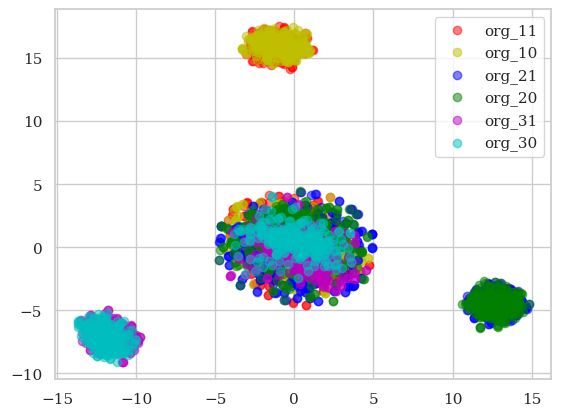

In [40]:
import matplotlib.pyplot as plt
X_embedded.shape

# X_embedded_all = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=150).fit_transform(np.concatenate([to_visualize,to_visualize_rec]))
# Y1 = np.concatenate([np.arange(0,300,1),np.arange(600,900,1),np.arange(1200,1500,1)])
# Y0 = np.concatenate([np.arange(300,600,1),np.arange(900,1200,1),np.arange(1500,1800,1)])
Y1 = [np.arange(0,300,1),np.arange(600,900,1),np.arange(1200,1500,1)]
Y0 = [np.arange(300,600,1),np.arange(900,1200,1),np.arange(1500,1800,1)]


plt.scatter(X_embedded[Y1[0],0], X_embedded[Y1[0],1],c='r',label='org_11',alpha=0.5)
plt.scatter(X_embedded[Y0[0],0], X_embedded[Y0[0],1],c='y',label='org_10',alpha=0.5)
plt.scatter(X_embedded[Y1[1],0], X_embedded[Y1[1],1],c='b',label='org_21',alpha=0.5)
plt.scatter(X_embedded[Y0[1],0], X_embedded[Y0[1],1],c='g',label='org_20',alpha=0.5)
plt.scatter(X_embedded[Y1[2],0], X_embedded[Y1[2],1],c='m',label='org_31',alpha=0.5)
plt.scatter(X_embedded[Y0[2],0], X_embedded[Y0[2],1],c='c',label='org_30',alpha=0.5)
plt.scatter(X_embedded_rec[Y1[0],0], X_embedded_rec[Y1[0],1],c='r',alpha=0.5)
plt.scatter(X_embedded_rec[Y0[0],0], X_embedded_rec[Y0[0],1],c='y',alpha=0.5)
plt.scatter(X_embedded_rec[Y1[1],0], X_embedded_rec[Y1[1],1],c='b',alpha=0.5)
plt.scatter(X_embedded_rec[Y0[1],0], X_embedded_rec[Y0[1],1],c='g',alpha=0.5)
plt.scatter(X_embedded_rec[Y1[2],0], X_embedded_rec[Y1[2],1],c='m',alpha=0.5)
plt.scatter(X_embedded_rec[Y0[2],0], X_embedded_rec[Y0[2],1],c='c',alpha=0.5)
# plt.scatter(X_embedded_all[:,0], X_embedded_all[:,1],c='g')
plt.legend()

In [199]:
TSNE_visu_rec2 = np.concatenate(TSNE_visu_rec)
TSNE_visu.shape

(1800, 2, 2)

In [200]:
Pastel = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)', 'rgb(139, 224, 164)', 'rgb(180, 151, 231)', 'rgb(179, 179, 179)','rgb(109, 229, 69)']
fig1 = go.Figure()

# for res,n, c in zip(np.concatenate([TSNE_visu, TSNE_visu_rec2]),["normals1","normals2","normaltg", 'recentereds1','recentereds2','recenteredtg'], Pastel):
#     fig1 = fig1.add_trace(
#     go.Scatter3d(
#         x=res[:, 0, 0],
#         y=res[:, 0, 1],
#         z=res[:, 1, 1],
#         mode="markers",
#         name=n,
#         marker=dict(size=8, color=c, opacity=0.9)
#         )
#     )
fig1 = fig1.add_trace(
go.Scatter3d(
    x=TSNE_visu[:900][:, 0, 0],
    y=TSNE_visu[:900][:, 0, 1],
    z=TSNE_visu[:900][:, 1, 1],
    mode="markers",
    name="firstTSNE",
    marker=dict(size=8, color=Pastel[0], opacity=0.9)
    )
)
fig1 = fig1.add_trace(
go.Scatter3d(
    x=TSNE_visu[900:][:, 0, 0],
    y=TSNE_visu[900:][:, 0, 1],
    z=TSNE_visu[900:][:, 1, 1],
    mode="markers",
    name="secondTSNE",
    marker=dict(size=8, color=Pastel[1], opacity=0.9)
    )
)
fig1 = fig1.add_trace(
go.Scatter3d(
    x=TSNE_visu_rec2[:, 0, 0],
    y=TSNE_visu_rec2[:, 0, 1],
    z=TSNE_visu_rec2[:, 1, 1],
    mode="markers",
    name="recTSNE",
    marker=dict(size=8, color=Pastel[2], opacity=0.9)
    )
)
fig1.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )
fig1.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

In [7]:
Pastel = ['rgb(102, 197, 204)', 'rgb(246, 207, 113)', 'rgb(248, 156, 116)', 'rgb(220, 176, 242)', 'rgb(135, 197, 95)', 'rgb(158, 185, 243)', 'rgb(254, 136, 177)', 'rgb(201, 219, 116)', 'rgb(139, 224, 164)', 'rgb(180, 151, 231)', 'rgb(179, 179, 179)','rgb(109, 229, 69)']
fig1 = go.Figure()

for res,n, c in zip([TSNE_visu, TSNE_visu_rec],["normal", 'recentered'], Pastel[:6]):
    fig1 = fig1.add_trace(
    go.Scatter3d(
        x=res[:, 0, 0],
        y=res[:, 0, 1],
        z=res[:, 1, 1],
        mode="markers",
        name=n,
        marker=dict(size=8, color=c, opacity=0.9)
        )
    )
fig1.update_layout(
        width=700,
        height=500,
        autosize=False,
        margin=dict(t=20, b=0, l=0, r=0),
        template="plotly_white",
    )
fig1.update_layout(
    scene=dict(xaxis_title="a", yaxis_title="b", zaxis_title="c"),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)